# EC7212 – Computer Vision and Image Processing
# Take Home Assignment 2



*   Reg No. : EG/2020/4095
*   Name    : Nethsara R.A.A
*   Github Link   :





### **Task 1**

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

(np.float64(-0.5), np.float64(199.5), np.float64(199.5), np.float64(-0.5))

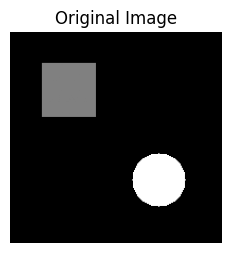

In [14]:

image = np.zeros((200, 200), dtype=np.uint8)

cv2.rectangle(image, (30, 30), (80, 80), 100, -1)
cv2.circle(image, (140, 140), 25, 200, -1)

plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

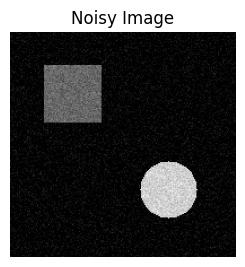

In [15]:
mean = 0
std_dev = 15
gaussian_noise = np.random.normal(mean, std_dev, image.shape).astype(np.int16)
noisy_image = image.astype(np.int16) + gaussian_noise
noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)

plt.subplot(1, 2, 2)
plt.title('Noisy Image')
plt.imshow(noisy_image, cmap='gray')
plt.axis('off')
plt.show()

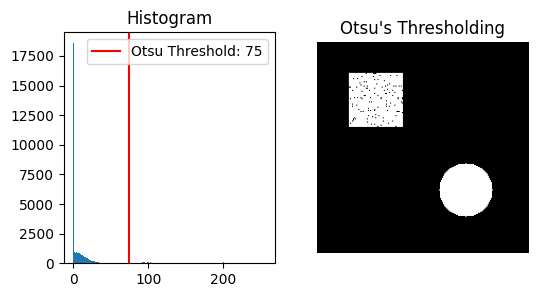

In [16]:
_, otsu_thresh = cv2.threshold(noisy_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plt.title('Histogram')
plt.hist(noisy_image.ravel(), bins=256, range=(0, 256))
plt.axvline(_, color='r', label=f'Otsu Threshold: {int(_)}')
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Otsu's Thresholding")
plt.imshow(otsu_thresh, cmap='gray')
plt.axis('off')
plt.show()

### **Task 2**

In [17]:

import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from collections import deque

In [18]:
img_path = os.path.join("/content/lamborghini-6011781_1280.jpg")
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
height, width = img.shape
print(f"Image dimensions: Width = {width} px, Height = {height} px")

if img is None:
    raise FileNotFoundError(f"Image not found at {img_path}")

Image dimensions: Width = 1280 px, Height = 853 px


In [19]:
def region_growing(image, seed, threshold=20):
    h, w = image.shape
    visited = np.zeros_like(image, dtype=np.uint8)
    region = np.zeros_like(image, dtype=np.uint8)

    seed_val = int(image[seed])
    queue = deque([seed])
    visited[seed] = 1
    region[seed] = 255

    while queue:
        y, x = queue.popleft()
        for dy in [-1, 0, 1]:
            for dx in [-1, 0, 1]:
                ny, nx = y + dy, x + dx
                if 0 <= ny < h and 0 <= nx < w and not visited[ny, nx]:
                    pixel_val = int(image[ny, nx])
                    if abs(pixel_val - seed_val) <= threshold:
                        queue.append((ny, nx))
                        visited[ny, nx] = 1
                        region[ny, nx] = 255

    return region

In [20]:
seed_point = (450, 450)

segmented = region_growing(img, seed=seed_point, threshold=45)

In [21]:
seed_y, seed_x = seed_point

seed_val = img[seed_y, seed_x]
print(f"Seed pixel value @ {seed_point}: {seed_val}")

Seed pixel value @ (450, 450): 174


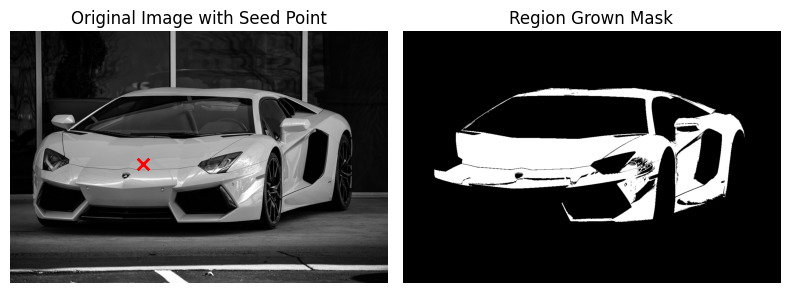

In [22]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.scatter(seed_x, seed_y,
            c='red', s=70, marker='x', linewidths=2)
plt.title("Original Image with Seed Point")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented, cmap='gray')
plt.title("Region Grown Mask")
plt.axis('off')

plt.tight_layout()
plt.show()